# Module 4 Section 2 Lab 1 - Linear to Logistic Regression

## Pendahuluan
Dalam sesi kali ini, kita akan belajar model *Logistic Regression*. Kita akan mulai dengan mengingat kembali model *Linear Regression* sebagai bagian dari *Logistic Regression*. Setelah itu, kita akan mempelajari formulasi model *Logistic Regression*. Kemudian, kita akan menyimpulkan sesi ini dengan melihat contoh data dunia nyata.

## Tujuan
- Menjelaskan perlunya *Logistic Regression*
- Menafsirkan parameter model *Logistic Regression*

# Recap of Liner Regression Model
Sebelumnya kita telah mempelajari model *Liniear Regression*. Dalam model ini, kita mencoba menyesuaikan hubungan linier antara dua variabel. 

Untuk mengingatnya, diberikan sebuah contoh sederhana untuk mencari hubungan antara usia dan pendapatan bulanan. Masuk akal jika kita mengasumsikan bahwa rata-rata orang tua memiliki pendapatan lebih tinggi daripada orang muda yang baru memasuki pasar kerja dan memiliki lebih sedikit pengalaman. 

Sebuah hubungan potensial bisa terlihat seperti grafik di bawah ini. Pendapatan bulanan ditunjukkan dalam Rp. 1.000.0000.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(60)

In [3]:
age = np.random.uniform(18, 65, 100)
income = np.random.normal((age/10), 0.5)

age = age.reshape(-1,1)

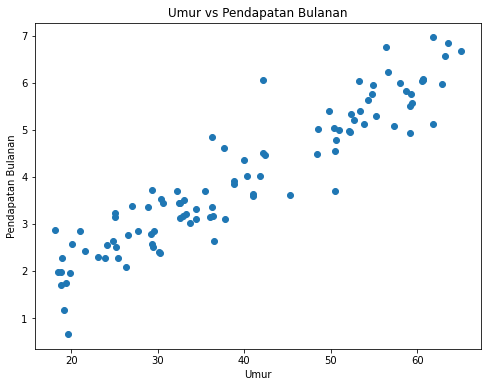

In [5]:
plt.figure(figsize=(8,6))
plt.title('Umur vs Pendapatan Bulanan')
plt.xlabel('Umur')
plt.ylabel('Pendapatan Bulanan')
plt.scatter(age, income)
plt.show()

Dalam *Liniear Regression*, kita akan mencoba menemukan hubungan antara usia dan pendapatan bulanan. Secara konseptual, ini berarti memasang garis yang mewakili hubungan antara usia dan pendapatan bulanan, seperti yang ditunjukkan di bawah ini.

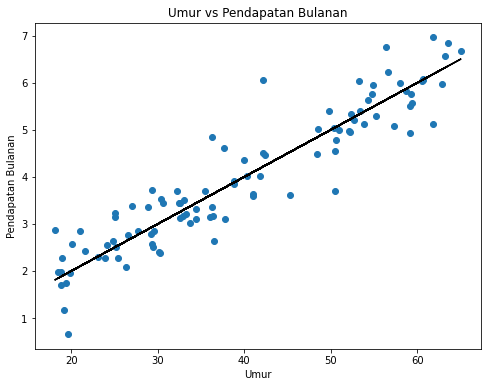

In [6]:
plt.figure(figsize=(8,6))
plt.title('Umur vs Pendapatan Bulanan')
plt.xlabel('Umur')
plt.ylabel('Pendapatan Bulanan')
plt.scatter(age, income)
plt.plot(age, age/10, c='black')
plt.show()

Idenya adalah kita bisa menggunakan garis ini untuk membuat prediksi di masa depan. Dalam hal ini, hubungan dimodelkan sebagai berikut: pendapatan bulanan yang diharapkan untuk seorang pegawai berumur 40 tahun adalah Rp. 3.000.000 (3 pada sumbu y). 

Tentu saja, pendapatan sebenarnya kemungkinan besar akan berbeda, tetapi ini menunjukkan apa yang diprediksi oleh model sebagai nilai pendapatan bulanan.

# Bagaimana ini terkait dengan *Logistic Regression*?

Sekarang, bayangkan kita mendapatkan data yang tidak memiliki informasi tentang pendapatan pasti setiap bulannya (bagaimanapun juga, orang tidak suka membicarakan berapa banyak pendapatan yang mereka peroleh!).

Tetapi, kita hanya memiliki informasi tentang apakah mereka menghasilkan lebih dari Rp. 4.000.0000 per bulan. 

Untuk itu, dengan data sebelumnya, kita akan membuat variabel baru `income_bin` yang mengubah pendapatan bulanan menjadi `1` saat pendapatan seseorang lebih dari Rp. 4.000.0000 dan `0` saat pendapatan kurang dari Rp. 4.000.0000.

In [7]:
income_bin = income > 4
income_bin = income_bin.astype(int)

print(income_bin)

[1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1
 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1]


Lihat apa yang terjadi ketika kita membuat grafik dengan dat ini.

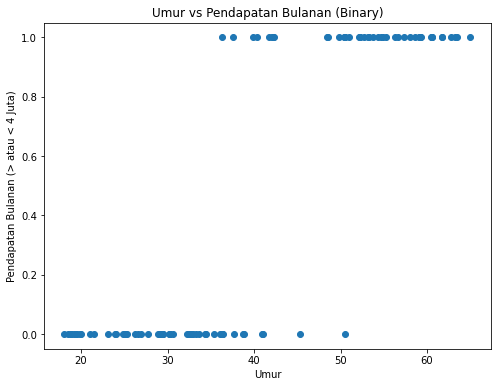

In [8]:
plt.figure(figsize=(8,6))
plt.title('Umur vs Pendapatan Bulanan (Binary)')
plt.xlabel('Umur')
plt.ylabel('Pendapatan Bulanan (> atau < 4 Juta)')
plt.scatter(age, income_bin)
plt.show()

Kita sudah dapat mengatakan bahwa memasang garis lurus (garis regresi) tidak akan berhasil di sini. Lihatlah apa yang terjadi ketika kita memasukkan garis regresi ke data ini.

Kita akan mencoba membuat model regresi linear pada data ini menggunakan `sklearn`.

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()              # Buat model regresi linear
lin_reg_model.fit(age, income_bin)

coef = lin_reg_model.coef_                      # Simpan koefisien
interc = lin_reg_model.intercept_

lin_income = (interc + age * coef)              # Buat garis regresi

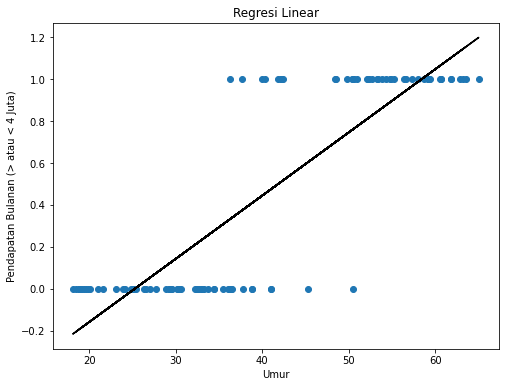

In [10]:
plt.figure(figsize=(8,6))
plt.title('Regresi Linear')
plt.xlabel('Umur')
plt.ylabel('Pendapatan Bulanan (> atau < 4 Juta)')
plt.scatter(age, income_bin)
plt.plot(age, lin_income, c='black')
plt.show()

Kita dapat melihat bahwa ini tidak masuk akal. Garis regresi ini tidak dapat memahami struktur sebenarnya dari apa yang terjadi ketika menggunakan model *Liniear Regression*. 

Sekarang, tanpa membahas detail tentang notasi matematika *Logistic Regression*, kita akan mencoba menyesuaikan dengan data sebelumnya.

In [12]:
from sklearn.linear_model import LogisticRegression

'''
Parameter `solver` harus ditentukan untuk menghindari warning, lihat dokumentasi untuk informasi lebih lanjut
`liblinear` direkomendasikan untuk kumpulan data kecil
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
'''

log_reg_model = LogisticRegression(C=1e5, solver='liblinear')       # Buat model regresi logistik
log_reg_model.fit(age, income_bin)

coef = log_reg_model.coef_                                          # Simpan koefisien
interc = log_reg_model.intercept_                                   # y-intercept

lin_pred = (age * coef + interc)                                    # Buat garis regresi

mod_income = 1 / (1 + np.exp(-lin_pred))                            # Lakukan transformasi log

# Urutkan angka untuk memastikan grafik terlihat benar
age_ordered, mod_income_ordered = zip(*sorted(zip(age ,mod_income.ravel()),key=lambda x: x[0]))

In [13]:
print(coef)

[[0.34549256]]


In [14]:
print(interc)

[-14.25280752]


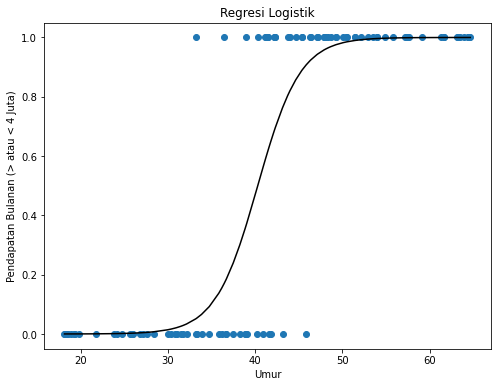

In [10]:
plt.figure(figsize=(8,6))
plt.title('Regresi Logistik')
plt.xlabel('Umur')
plt.ylabel('Pendapatan Bulanan (> atau < 4 Juta)')
plt.scatter(age, income_bin)
plt.plot(age_ordered, mod_income_ordered, c='black')
plt.show()

Ini sudah terlihat jauh lebih baik! Kita dapat melihat bahwa fungsi ini memiliki bentuk-S yang mendatar ke 0 pada sisi kiri dan 1 pada sisi kanan. Inilah yang kita butuhkan di sini. 

Semoga contoh sederhana ini adalah cara yang baik untuk menunjukkan mengapa *Logistic Regression* berguna. Sekarang, saatnya memahami formulasi matematika yang memungkinkan untuk *Logistic Regression*.

# Formulasi Model *Logistic Regression*


## Model
Model *Liniear Regression* dapat ditulis sebagai:

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \beta_n x_n $$

Ketika ada $n$ prediktor $x_1,\ldots,x_n$ dan $n+1$ estimasi parameter yang diestimasi oleh model $\hat\beta_0, \hat\beta_1,\ldots, \hat\beta_n$. $ \hat y $ adalah estimator untuk variabel hasil.

Pada contoh diatas, kita dapat menerjemahkan formulasi model sebagai:

$$ \text{pendapatan} = \beta_0 + \beta_1 \text{umur} $$

Saat ingin menerapkan formulasi ke kumpulan data biner, yang sebenarnya ingin kita lakukan adalah melakukan **klasifikasi** data dalam satu grup versus grup lainnya. Dalam contoh ini, kita ingin mengklasifikasikan 100 orang sebaik mungkin dalam "menghasilkan lebih dari 4.000.000" dan "menghasilkan kurang dari 4.000.000". Model harus menebak berapa **probabilitas** ketika menjadi bagian dari satu kelompok versus kelompok lain. Dan itulah yang dapat dilakukan oleh model *Logistic Regression*!

Pada dasarnya, yang terjadi adalah *Linear Regression* **diubah** sedemikian rupa sehingga hasilnya mengambil nilai antara 0 dan 1. Ini kemudian dapat ditafsirkan sebagai probabilitas (misalnya, 0,2 adalah probabilitas 20%). Jika diterapkan pada contoh kita, formulasi model *Logistic Regression* akan terlihat seperti ini:

$$ P(\text{pendapatan} > 4000000) = \displaystyle \frac{1}{1+e^{-(\hat \beta_0+\hat \beta_1 \text{umur})}}$$

Perhatikan bahwa hasilnya ditulis sebagai $P(\text{pendapatan} > 4000)$. Ini berarti bahwa output harus ditafsirkan sebagai probabilitas pendapatan bulanan lebih dari Rp. 4.000.000.

## Interpretasi
Seperti disebutkan sebelumnya, probabilitas pendapatan lebih dari 4000 dapat dihitung menggunakan:

$$ P(\text{pendapatan} > 4000000) = \displaystyle \frac{1}{1+e^{-(\hat \beta_0+\hat \beta_1 \text{umur})}}$$

Kita dapat menunjukkannya dengan mengalikan pembilang dan penyebut dengan $e^{(\hat \beta_0+\hat \beta_1 \text{umur})}$

Hasilnya, kita dapat menghitung $P(\text{pendapatan} \leq 4000000)$ sebagai:

$$ P(\text{pendapatan} < 4000000) = 1- \displaystyle \frac{e^{\hat \beta_0+\hat \beta_1 \text{umur}}}{1+e^{\hat \beta_o+\hat \beta_1 \text{umur}}}= \displaystyle \frac{1}{1+e^{\hat \beta_0+\hat \beta_1 \text{umur}}}$$

Ini tidak terlalu spektakuler, tetapi menggabungkan kedua hasil ini mengarah pada interpretasi yang mudah dari parameter model yang dipicu oleh peluang:

$$ \dfrac{P(\text{pendapatan} > 4000000)}{P(\text{pendapatan} < 4000000)} = e^{\hat \beta_0+\hat \beta_1 \text{umur}} $$

Ini dapat diartikan sebagai *peluang yang mendukung pendapatan lebih besar dari Rp. 4.000.000*.

Dalam kombinasi dengan sifat matematika dari fungsi eksponensial mengarah pada fakta bahwa jika diterapkan pada contoh kita:

jika *umur* bertambah 1, peluangnya dikalikan dengan $e^{\beta_1}$

Dalam contoh kita, ada hubungan positif antara usia dan pendapatan. Ini akan mengarah ke positif $\beta_1 > 0$, jadi $e^{\beta_1}>1$, dan peluang akan meningkat seiring *usia* meningkat.






# Contoh Data Dunia Nyata

In [15]:
import statsmodels as sm
import sklearn.preprocessing as preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from scipy import stats

In [ ]:
!wget https://raw.githubusercontent.com/ksnugroho/ai-mastery/main/dataset/salaries_final.csv

In [17]:
df = pd.read_csv('dataset/salaries_final.csv', index_col=0)
df.head()

,Age,Education,Occupation,Relationship,Race,Sex,Target
0,39,Bachelors,Adm-clerical,Not-in-family,White,Male,<=50K
1,50,Bachelors,Exec-managerial,Husband,White,Male,<=50K
2,38,HS-grad,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,53,11th,Handlers-cleaners,Husband,Black,Male,<=50K
4,28,Bachelors,Prof-specialty,Wife,Black,Female,<=50K


In [18]:
df.shape

(32561, 7)

Untuk contoh ini, kita akan menyesuaikan model *Logistic Regression* ke `Target` menggunakan `Age`, `Race`, dan `Sex`. Karena `Target`, `Race`, dan `Sex` adalah data kategori, mereka perlu dikonversi ke tipe data numerik terlebih dahulu.

Fungsi `get_dummies()` hanya akan mengonversi tipe data `object` dan `category` ke variabel dummy sehingga aman untuk meneruskan `Age` ke `get_dummies()`. Perhatikan bahwa kami juga meneruskan dua argumen tambahan, `drop_first=True` dan `dtype=float`. Argumen `drop_first=True` menghapus level pertama untuk setiap variabel kategori dan argumen `dtype=float` mengubah tipe data semua variabel dummy menjadi float.

In [19]:
x_feats = ['Race', 'Sex', 'Age']
X = pd.get_dummies(df[x_feats], drop_first=True, dtype=float)

y = pd.get_dummies(df['Target'], drop_first=True, dtype=float)
y = y['>50K']

In [21]:
X.head()

,Age,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Male
0,39,0.0,0.0,0.0,1.0,1.0
1,50,0.0,0.0,0.0,1.0,1.0
2,38,0.0,0.0,0.0,1.0,1.0
3,53,0.0,1.0,0.0,0.0,1.0
4,28,0.0,1.0,0.0,0.0,0.0


In [22]:
import statsmodels.api as sm

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.498651
         Iterations 6


In [23]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                   >50K   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32554
Method:                           MLE   Df Model:                            6
Date:                Wed, 16 Mar 2022   Pseudo R-squ.:                 0.09666
Time:                        10:14:37   Log-Likelihood:                -16237.
converged:                       True   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.4248      0.189    -23.380      0.000      -4.796      -4.054
Age                         0.0387      0.001     38.530      0.000       0.037       0.041


Kita juga dapat menggunakan `scikit-learn` untuk mengambil estimasi parameter. Kerugiannya di sini adalah tidak ada nilai-p untuk estimasi parameter Anda!

In [24]:
log_reg_model = LogisticRegression(fit_intercept=False, solver='liblinear')

log_reg_model.fit(X, y)

LogisticRegression(C=100000.0, fit_intercept=False, solver='liblinear')

In [25]:
log_reg_model.coef_

array([[-4.38706168,  0.0387101 ,  0.96178734,  0.1439782 , -0.14384207,
         0.83689295,  1.20671204]])

# Kesimpulan

Pada sesi ini, kita mengembangkan pengetahuan sebelumnya tentang *Liniear Regression* dan membangun pemahaman intuitif tentang bagaimana hal ini dapat diadaptasi untuk klasifikasi. Kita juga mendemonstrasikan model untuk melakukan *Logistic Regression*.

